# Nosebleed Treatment : Data Analysis

In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy as sp
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm
import re

In [27]:
# import data
dataSubject = pd.read_csv('subject.csv')
dataEfficacy = pd.read_csv('efficacy.csv')
dataRandomization = pd.read_csv('randomization.csv')
allData = pd.merge(dataSubject, pd.merge(dataEfficacy, dataRandomization, on='subject'), on='subject')

In [28]:
allData.shape

(444, 9)

In [29]:
allData.head(2)

,subject,country,eye.colour,tissue.use,previous.year,mucus.viscosity,nosebleeds,duration,arm
0,359,A,BLUE,MEDIUM,2,1.304348,4,365,PLACEBO
1,241,A,BLUE,HIGH,2,0.869565,0,365,PLACEBO


In [30]:
cols = allData.columns

In [32]:
cols

Index(['subject', 'country', 'eye.colour', 'tissue.use', 'previous.year',
       'mucus.viscosity', 'nosebleeds', 'duration', 'arm'],
      dtype='object')

In [34]:
cols = [ re.sub('\.','_', c) for c in cols] #replace '.' to avoid confusion
#cols

In [36]:
allData.columns = cols #replace the column header by new column headers

In [37]:
allData.head(1)

,subject,country,eye_colour,tissue_use,previous_year,mucus_viscosity,nosebleeds,duration,arm
0,359,A,BLUE,MEDIUM,2,1.304348,4,365,PLACEBO


In [38]:
#missing data?
allData.isna().describe()

,subject,country,eye_colour,tissue_use,previous_year,mucus_viscosity,nosebleeds,duration,arm
count,444,444,444,444,444,444,444,444,444
unique,1,1,2,1,1,2,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,444,444,384,444,444,443,444,444,444


In [41]:
# replace viscosity by mean and eye_colour by some category
meanViscosity = np.round(allData['mucus_viscosity'].mean(),4)
allData['mucus_viscosity'].fillna(meanViscosity, inplace=True)  # replace missing viscosity by the mean
allData['eye_colour'].fillna('notReported', inplace=True)      # replacing missing eyecolor by 'notReported'

In [43]:
allData.isna().describe()

,subject,country,eye_colour,tissue_use,previous_year,mucus_viscosity,nosebleeds,duration,arm
count,444,444,444,444,444,444,444,444,444
unique,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False
freq,444,444,444,444,444,444,444,444,444


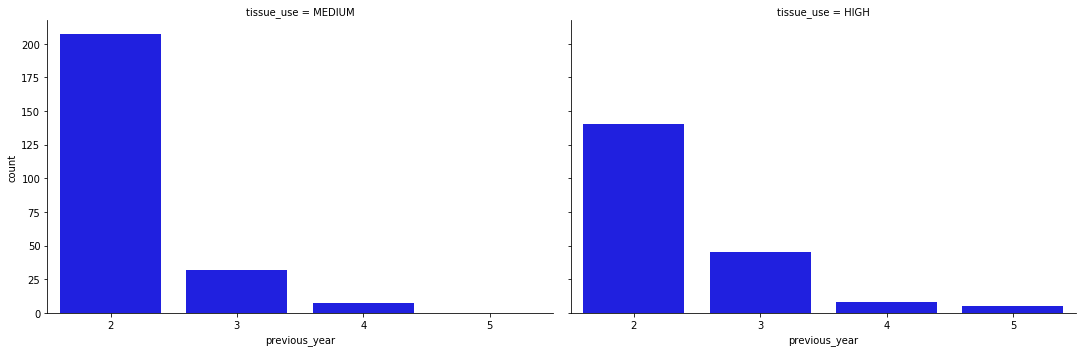

In [57]:
g = sns.factorplot(x='previous_year', col='tissue_use', 
                   data=allData, kind='count', size=5, aspect=1.5, color='blue')

### Testing effects of country, eyeColor and tissueuse on nosebleed before treatment
#### ANOVA

In [53]:
#by country
depVar = allData.previous_year
indepVar = allData.country
formula = 'depVar ~ indepVar'
lm1 = ols(formula, allData).fit()
#print(lm1.summary())

table1 = anova_lm(lm1, typ=2)
print(table1)

              sum_sq     df         F    PR(>F)
indepVar   13.630627    9.0  4.874412  0.000003
Residual  134.846851  434.0       NaN       NaN


In [54]:
#by eyecolor
depVar = allData.previous_year
indepVar = allData.eye_colour
formula = 'depVar ~ indepVar'
lm1 = ols(formula, allData).fit()
#print(lm1.summary())

table1 = anova_lm(lm1, typ=2)
print(table1)

              sum_sq     df         F    PR(>F)
indepVar    0.678142    3.0  0.672945  0.568989
Residual  147.799336  440.0       NaN       NaN


In [55]:
#by tissueUse
depVar = allData.previous_year
indepVar = allData.tissue_use
formula = 'depVar ~ indepVar'
lm1 = ols(formula, allData).fit()
#print(lm1.summary())

table1 = anova_lm(lm1, typ=2)
print(table1)

              sum_sq     df          F    PR(>F)
indepVar    4.250821    1.0  13.027153  0.000342
Residual  144.226657  442.0        NaN       NaN


In [60]:
allData[['mucus_viscosity','previous_year']].corr(method='spearman')

,mucus_viscosity,previous_year
mucus_viscosity,1.000000,-0.024564
previous_year,-0.024564,1.000000


In [59]:
# Eyecolor - Does not seem to have effect 

### After Treament
#### Testing if the treatment made any significant change on the count of nosebleed. Lets do a t-test
* H0 : There is no significant differenct
* H1 : There is improvement

In [63]:
from statsmodels.stats.weightstats import ttest_ind
sample1 = allData['nosebleeds'][(allData['duration']==365) & (allData['arm']=='PLACEBO')]
sample2 = allData['nosebleeds'][(allData['duration']==365) & (allData['arm']=='ACTIVE')]
tscore, df, p = ttest_ind(sample1,sample2)
print('t-score: {}, p: {}, df: {}'.format(tscore,df,p))

t-score: 1.3781495118402645, p: 0.1689554505330777, df: 386.0


### We failed to reject the H0

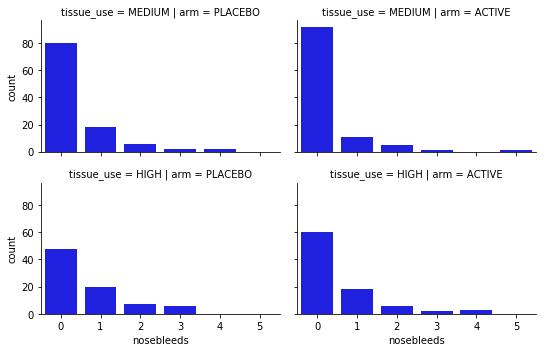

In [70]:
g = sns.factorplot(x='nosebleeds', col='arm', row='tissue_use', 
                   data=allData[allData['duration']==365], 
                   kind='count', size=2.5, aspect=1.5, color='blue')

### Statisitcal analysis is not able to show that treatment plays a significant role. 
* Now let us focus on the case where tissue use is high

In [72]:
highTissueData = allData[(allData['tissue_use']=='HIGH') & (allData['duration']==365)]

In [73]:
highTissueData.shape

(170, 9)

In [75]:
highTissueData.head(2)

,subject,country,eye_colour,tissue_use,previous_year,mucus_viscosity,nosebleeds,duration,arm
1,241,A,BLUE,HIGH,2,0.869565,0,365,PLACEBO
4,442,A,BLUE,HIGH,2,1.304348,0,365,ACTIVE


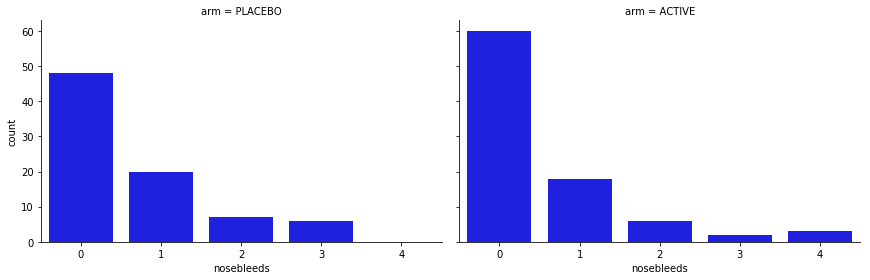

In [80]:
g = sns.factorplot(x='nosebleeds', col='arm', 
                   data=highTissueData, 
                   kind='count', size=4, aspect=1.5, color='blue')

In [78]:
sample1 = highTissueData['nosebleeds'][allData['arm']=='PLACEBO']
sample2 = highTissueData['nosebleeds'][allData['arm']=='ACTIVE']
tscore, df, p = ttest_ind(sample1,sample2)
print('t-score: {}, p: {}, df: {}'.format(tscore,df,p))

t-score: 0.7057080170178328, p: 0.48134714109502486, df: 168.0


#### no significant difference

## Conclusion of the statistical analysis
* There is not reason to believe that the treatment has significant effect.